In [8]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

In [13]:
# Lists to store the extracted values
targets = []
outputs = []
losses = []

# Splitting the content by lines and iterating through them
with open('../checkpoints/0809/txts/0809-sh_em_1qm_v2_validation_1.txt', 'r') as file:
    for line in file.read().split('\n'):
        if "target:" in line:
            parts = line.split(',')
            targets.append(float(parts[1].split(':')[1].strip()))
            outputs.append(float(parts[2].split(':')[1].strip()))
            losses.append(float(parts[3].split(':')[1].strip()))

y_test, y_pred, losses = np.array(targets)*1000, np.array(outputs)*1000, losses

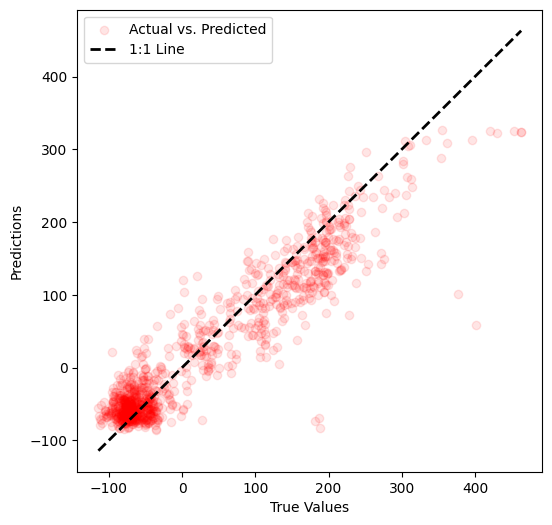

In [16]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='r', label='Actual vs. Predicted', alpha=0.1)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', lw=2, label='1:1 Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()